# Metrics

## Accuracy

Definition: 
Accuracy measures the ratio of correctly predicted instances to the total number of instances.
Formula: Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

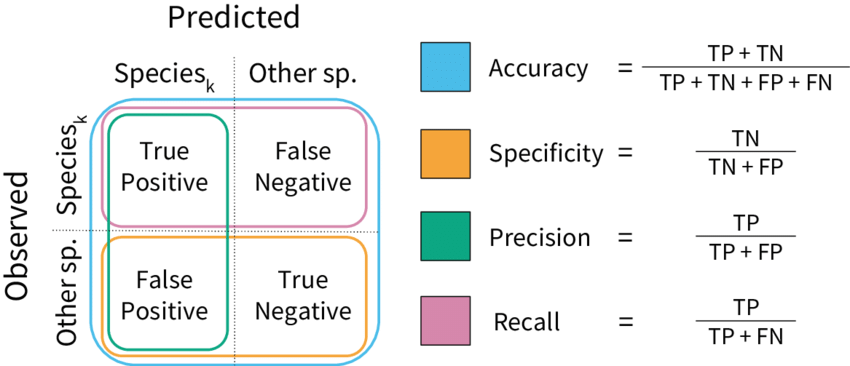

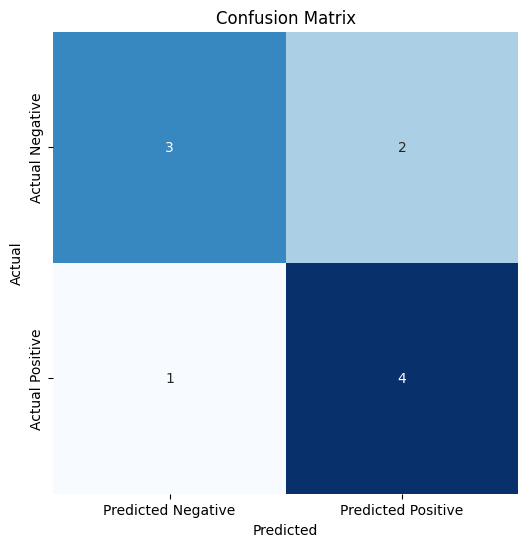

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and predicted labels (replace with your actual data)
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7


### Precision
Definition: Precision measures the ratio of true positives to the total predicted positives.

Precision = TP / (TP + FP)


### Recall

Definition: Recall measures the ratio of true positives to the total actual positives.

Formula: Recall = TP / (TP + FN)

### F1 Score

Definition: The F1 score is the harmonic mean of precision and recall. It balances both precision and recall.

Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727273


In [6]:
from sklearn.metrics import roc_auc_score

# Assuming you have model predictions and true labels as y_pred and y_true
roc_auc = roc_auc_score(y_true, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7000000000000001


In [10]:

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X

array([[-0.6693561 , -1.49577819, -0.87076638, ..., -1.26733697,
        -1.2763343 ,  1.01664321],
       [ 0.09337237,  0.78584826,  0.10575379, ..., -0.12270893,
         0.6934308 ,  0.91136272],
       [-0.90579721, -0.60834121,  0.29514098, ...,  0.83049813,
        -0.73733198, -0.5782121 ],
       ...,
       [-0.20013455, -1.46108168,  1.79701652, ..., -1.50280171,
        -1.27473745,  1.60111869],
       [ 0.03935575,  0.24868361, -0.47532342, ...,  0.09912579,
         0.54269228,  1.20827474],
       [ 0.76921528,  0.47076539,  0.16994471, ...,  0.6561162 ,
         0.64333186, -2.02100232]])

Explanation:
1. We generate synthetic data for binary classification using make_classification from scikit-learn.

2. We split the data into training and testing sets.

3. We train a logistic regression classifier on the training data.

4. We predict the probabilities of the positive class for the test set using predict_proba.

5. We calculate the ROC curve using roc_curve and compute the Area Under the ROC Curve (AUC-ROC) using auc.

6. Finally, we plot the ROC curve using Matplotlib.

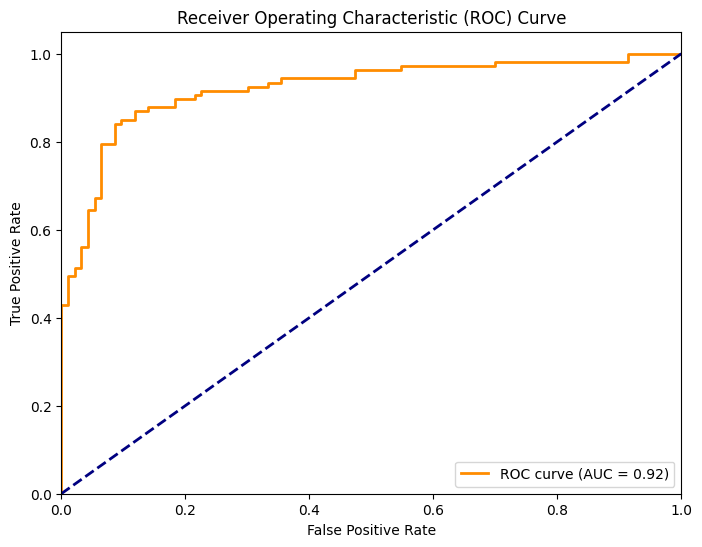

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a binary classifier (e.g., logistic regression)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Predict the probabilities of positive class for the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the ROC Curve (AUC-ROC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Using Keras

metrics=[
                  Accuracy(),
                  Precision(),
                  Recall(),
                  AUC(),
                  TruePositives(),
                  TrueNegatives(),
                  FalsePositives(),
                  FalseNegatives()

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from sklearn.metrics import f1_score
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to binary (5 or above as positive)
y_train, y_test = (y_train >= 5).astype(int), (y_test >= 5).astype(int)

# Build a simple binary classification model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # One neuron for binary classification with sigmoid activation
])

# Compile the model with multiple evaluation metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[
                _____
              ])

# Train the model
model.fit(x_train, y_train, epochs=5, verbose=1)

# Evaluate the model on the test dataset
test_metrics = model.evaluate(x_test, y_test, verbose=0)

# Calculate F1 score manually
y_pred = model.predict(x_test)
y_pred_classes = (y_pred >= 0.5).astype(int)
f1 = f1_score(y_test, y_pred_classes)

# Print evaluation metrics
print("Test Loss:", test_metrics[0])
print("Binary Accuracy:", test_metrics[1])
print("Precision:", test_metrics[2])
print("Recall:", test_metrics[3])
print("AUC ROC:", test_metrics[4])
print("True Positives:", test_metrics[5])
print("True Negatives:", test_metrics[6])
print("False Positives:", test_metrics[7])
print("False Negatives:", test_metrics[8])
print("F1 Score:", f1)


Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 0.1172 - binary_accuracy: 0.9566 - precision_8: 0.9547 - recall_6: 0.9568 - auc_6: 0.9911 - true_positives_4: 28134.0000 - true_negatives_4: 29261.0000 - false_positives_4: 1335.0000 - false_negatives_4: 1270.0000
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0575 - binary_accuracy: 0.9796 - precision_8: 0.9785 - recall_6: 0.9800 - auc_6: 0.9974 - true_positives_4: 28815.0000 - true_negatives_4: 29963.0000 - false_positives_4: 633.0000 - false_negatives_4: 589.0000
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0401 - binary_accuracy: 0.9860 - precision_8: 0.9853 - recall_6: 0.9863 - auc_6: 0.9986 - true_positives_4: 29000.0000 - true_negatives_4: 30162.0000 - false_positives_4: 434.0000 - false_negatives_4: 404.0000
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0311 - binary_accuracy: 0.9893 - precision_8: 0.9887 - r

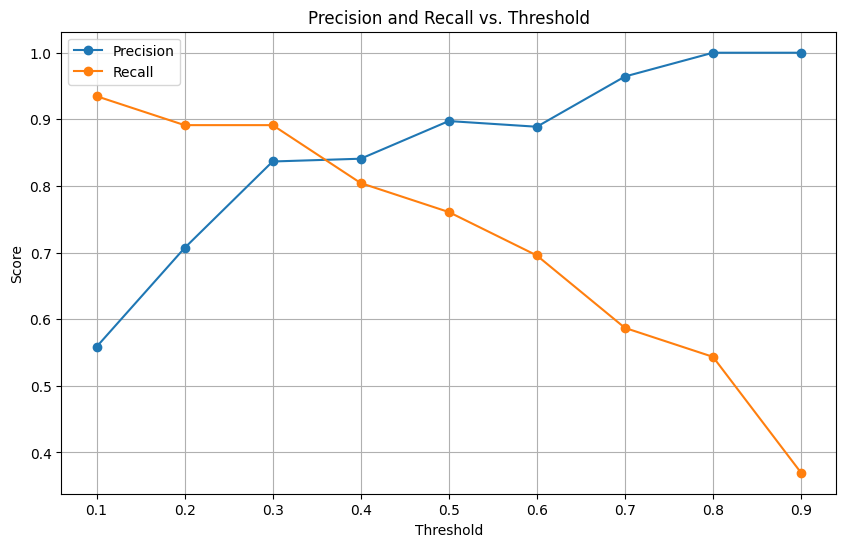

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Generate synthetic data for binary classification with two informative features
X, y = make_classification(
    n_samples=1000, 
    n_features=2,  # Set the number of informative features to 2
    n_informative=2, 
    n_redundant=0, 
    n_classes=2, 
    weights=[0.8, 0.2], 
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a binary classifier (logistic regression)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Initialize a range of threshold values to experiment with
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize lists to store precision and recall values for different thresholds
precision_scores = []
recall_scores = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot precision and recall vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()






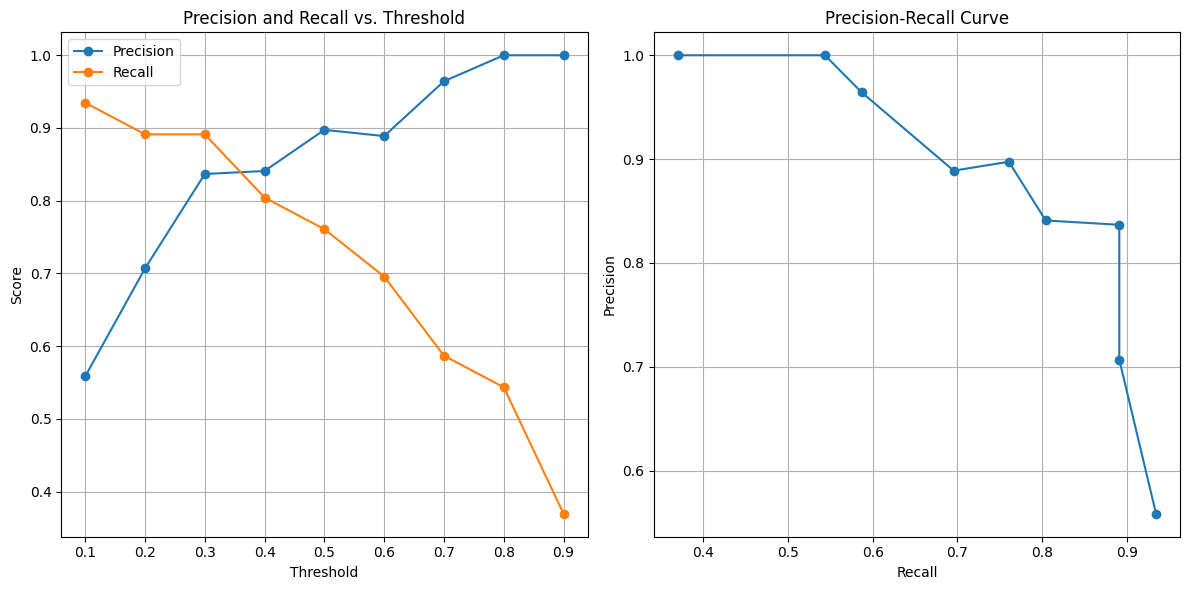

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, average_precision_score

# Generate synthetic data for binary classification with two informative features
X, y = make_classification(
    n_samples=1000, 
    n_features=2,  # Set the number of informative features to 2
    n_informative=2, 
    n_redundant=0, 
    n_classes=2, 
    weights=[0.8, 0.2], 
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a binary classifier (logistic regression)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Initialize a range of threshold values to experiment with
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize lists to store precision, recall, and average precision values for different thresholds
precision_scores = []
recall_scores = []
average_precision_scores = []

# Calculate precision, recall, and average precision for each threshold
for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)
    precision_scores.append(precision)
    recall_scores.append(recall)
    average_precision = average_precision_score(y_test, y_pred_prob)
    average_precision_scores.append(average_precision)

# Plot precision and recall vs. threshold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_scores, precision_scores, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()

plt.show()


Validation and Test set

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the dataset into training, validation, and test sets
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data and validate on the validation set
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on new data
predictions = model.predict(x_test)

# Calculate accuracy on test set
y_true_labels = tf.argmax(y_test, axis=1)
y_pred_labels = tf.argmax(predictions, axis=1)
test_accuracy = accuracy_score(y_true_labels, y_pred_labels)

print(f"Test Accuracy (via predictions): {test_accuracy * 100:.2f}%")


Epoch 1/5
1563/1563 [==============================] - 14s 7ms/step - loss: 0.2647 - accuracy: 0.9225 - val_loss: 0.1370 - val_accuracy: 0.9583
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1142 - accuracy: 0.9655 - val_loss: 0.1092 - val_accuracy: 0.9668
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0793 - accuracy: 0.9756 - val_loss: 0.1034 - val_accuracy: 0.9701
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.1237 - val_accuracy: 0.9667
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0937 - accuracy: 0.9714
Test Loss: 0.0937
Test Accuracy: 97.14%
313/313 [==============================] - 1s 3ms/step
Test Accuracy (via predictions): 97.14%


We use train_test_split twice to split the dataset into training, validation, and test sets based on specified percentages (train_percentage, val_percentage, and test_percentage).

The training set contains 70% of the data, the validation set contains 15%, and the test set contains 15%.

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the dataset into training, validation, and test sets
train_percentage = 0.7
val_percentage = 0.15
test_percentage = 0.15

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_percentage, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=test_percentage, random_state=42)

# Build a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data and validate on the validation set
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on new data
predictions = model.predict(x_test)

# Calculate accuracy on test set
y_true_labels = tf.argmax(y_test, axis=1)
y_pred_labels = tf.argmax(predictions, axis=1)
test_accuracy = accuracy_score(y_true_labels, y_pred_labels)

print(f"Test Accuracy (via predictions): {test_accuracy * 100:.2f}%")


Epoch 1/5
1355/1355 [==============================] - 12s 7ms/step - loss: 0.2811 - accuracy: 0.9187 - val_loss: 0.1385 - val_accuracy: 0.9574
Epoch 2/5
1355/1355 [==============================] - 9s 7ms/step - loss: 0.1214 - accuracy: 0.9640 - val_loss: 0.1076 - val_accuracy: 0.9668
Epoch 3/5
1355/1355 [==============================] - 9s 7ms/step - loss: 0.0829 - accuracy: 0.9742 - val_loss: 0.0881 - val_accuracy: 0.9740
Epoch 4/5
1355/1355 [==============================] - 9s 7ms/step - loss: 0.0607 - accuracy: 0.9804 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 5/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0941 - accuracy: 0.9718
Test Loss: 0.0941
Test Accuracy: 97.18%
240/240 [==============================] - 1s 3ms/step
Test Accuracy (via predictions): 97.18%
